In [ ]:
import b3_parser as b3

In [ ]:
b3.CreateCSV('COTAHIST_A2016.TXT')
b3.CreateCSV('COTAHIST_A2017.TXT')
b3.CreateCSV('COTAHIST_A2018.TXT')
b3.CreateCSV('COTAHIST_A2019.TXT')
b3.CreateCSV('COTAHIST_A2020.TXT')

In [49]:
import pandas as pd

In [50]:
df_20 = pd.read_csv('COTAHIST_A2020.csv')
df_19 = pd.read_csv('COTAHIST_A2019.csv')
df_18 = pd.read_csv('COTAHIST_A2018.csv')
df_17 = pd.read_csv('COTAHIST_A2017.csv')
df_16 = pd.read_csv('COTAHIST_A2016.csv')

In [51]:
def process(*args):
    dfList = []

    for df in args:
        df = df.loc[:, ['DATA', 'CODNEG', 'PREULT']] \
               .drop(df.index[-1])
        df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
        df.iloc[:, 2:6] = df.iloc[:, 2:6].div(100)
        df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d')
        df.iloc[:, 0] = df.iloc[:, 0].dt.strftime('%Y-%m-%d')
        dfList.append(df)
    
    return dfList

In [52]:
df_20, df_19, df_18, df_17, df_16 = process(df_20, df_19, df_18, df_17, df_16)

In [53]:
def select_ibov(*args):
    dfList = []

    for df in args:
        df = df[df['CODNEG'] == 'IBOV11']
        df['DATA'] = pd.to_datetime(df['DATA'])
        df = df[df['DATA'].dt.month <= 7]
        df['MONTH'] = df['DATA'].dt.strftime('%b')
        df = df.loc[:, ['PREULT', 'MONTH']].set_index('MONTH')
        dfList.append(df)

    return dfList

In [54]:
df_20, df_19, df_18, df_17, df_16 = select_ibov(df_20, df_19, df_18, df_17, df_16)

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

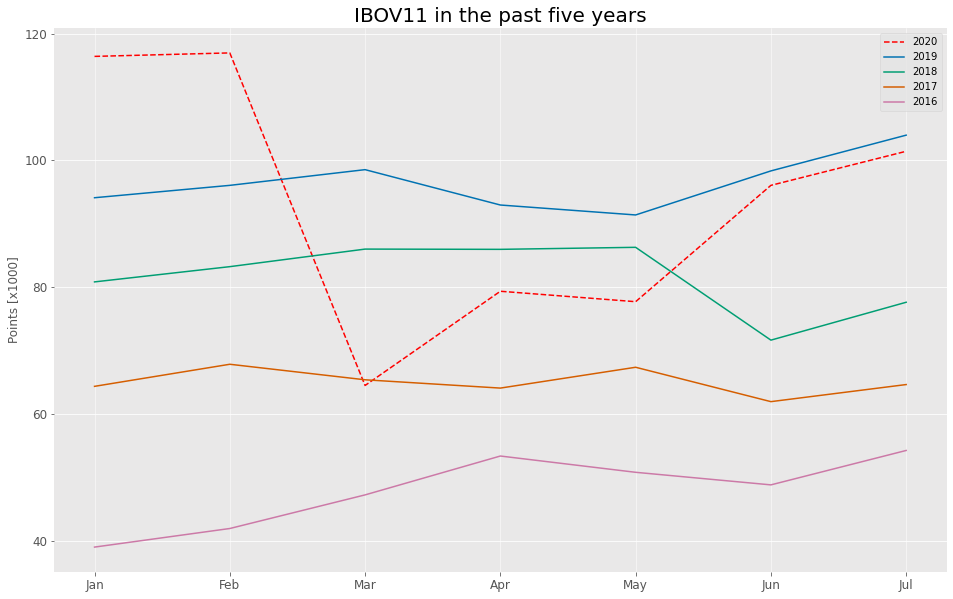

In [156]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.style.use('seaborn-colorblind')
ax.set_facecolor('#e9e8e8')

ax.plot(df_20, 'r--', label='2020')
ax.plot(df_19, label='2019')
ax.plot(df_18, label='2018')
ax.plot(df_17, label='2017')
ax.plot(df_16, label='2016')

ax.legend()
plt.yticks([40000, 60000, 80000, 100000, 120000], ['40', '60', '80', '100', '120'], fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Points [x1000]')
plt.title('IBOV11 in the past five years', {'fontsize': 20});
plt.grid(axis='x', color='white', linewidth=0.5)
[ax.spines[loc].set_visible(False) for loc in ['top', 'right', 'left', 'bottom']];